In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import os

In [15]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
os.chdir('../')
os.getcwd()


CUDA Available? False


'D:\\dev\\ERA\\pytorchassignment'

In [16]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

In [17]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [18]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

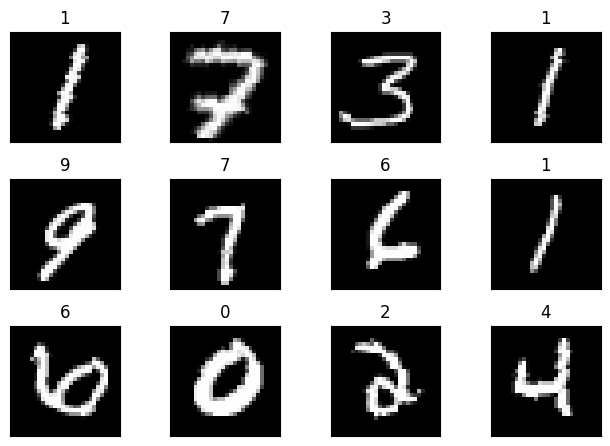

In [19]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [20]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [29]:
from pytsrc.model import ModelBuilder
mb = ModelBuilder('cnnModel')
mb.build()

model = mb.model.to(mb.device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  mb.train(model, mb.device, train_loader, optimizer, criterion)
  mb.test(model, mb.device, test_loader, criterion)
  scheduler.step()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------
Epoch 1


Train: Loss=1.2323 Batch_id=117 Accuracy=31.17: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:53<00:00,  2.23it/s]


Test set: Average loss: 1.2265, Accuracy: 6904/10000 (69.04%)

Epoch 2


Train: Loss=0.1120 Batch_id=117 Accuracy=89.54: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [01:04<00:00,  1.82it/s]


Test set: Average loss: 0.1181, Accuracy: 9631/10000 (96.31%)

Epoch 3


Train: Loss=0.1243 Batch_id=117 Accuracy=95.74: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [01:02<00:00,  1.88it/s]


Test set: Average loss: 0.0646, Accuracy: 9798/10000 (97.98%)

Epoch 4


Train: Loss=0.1148 Batch_id=117 Accuracy=96.78: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [01:03<00:00,  1.86it/s]


Test set: Average loss: 0.0555, Accuracy: 9821/10000 (98.21%)

Epoch 5


Train: Loss=0.0706 Batch_id=117 Accuracy=97.20: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [01:02<00:00,  1.89it/s]


Test set: Average loss: 0.0461, Accuracy: 9843/10000 (98.43%)

Epoch 6


Train: Loss=0.0511 Batch_id=117 Accuracy=97.62: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [01:03<00:00,  1.85it/s]


Test set: Average loss: 0.0488, Accuracy: 9849/10000 (98.49%)

Epoch 7


Train: Loss=0.0910 Batch_id=117 Accuracy=97.89: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [01:06<00:00,  1.77it/s]


Test set: Average loss: 0.0363, Accuracy: 9883/10000 (98.83%)

Epoch 8


Train: Loss=0.0882 Batch_id=117 Accuracy=98.08: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [01:05<00:00,  1.82it/s]


Test set: Average loss: 0.0332, Accuracy: 9895/10000 (98.95%)

Epoch 9


Train: Loss=0.0207 Batch_id=117 Accuracy=98.19: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [01:03<00:00,  1.86it/s]


Test set: Average loss: 0.0473, Accuracy: 9848/10000 (98.48%)

Epoch 10


Train: Loss=0.1447 Batch_id=117 Accuracy=98.36: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [01:02<00:00,  1.89it/s]


Test set: Average loss: 0.0359, Accuracy: 9888/10000 (98.88%)

Epoch 11


Train: Loss=0.0288 Batch_id=117 Accuracy=98.41: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [01:02<00:00,  1.89it/s]


Test set: Average loss: 0.0311, Accuracy: 9893/10000 (98.93%)

Epoch 12


Train: Loss=0.0117 Batch_id=117 Accuracy=98.49: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:58<00:00,  2.02it/s]


Test set: Average loss: 0.0281, Accuracy: 9907/10000 (99.07%)

Epoch 13


Train: Loss=0.0701 Batch_id=117 Accuracy=98.56: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [01:02<00:00,  1.90it/s]


Test set: Average loss: 0.0285, Accuracy: 9903/10000 (99.03%)

Epoch 14


Train: Loss=0.0447 Batch_id=117 Accuracy=98.77: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [01:02<00:00,  1.88it/s]


Test set: Average loss: 0.0243, Accuracy: 9918/10000 (99.18%)

Epoch 15


Train: Loss=0.0127 Batch_id=117 Accuracy=98.69: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [01:02<00:00,  1.87it/s]


Test set: Average loss: 0.0297, Accuracy: 9908/10000 (99.08%)

Epoch 16


Train: Loss=0.0146 Batch_id=117 Accuracy=98.97: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [01:05<00:00,  1.79it/s]


Test set: Average loss: 0.0208, Accuracy: 9929/10000 (99.29%)

Epoch 17


Train: Loss=0.0211 Batch_id=117 Accuracy=99.04: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [01:03<00:00,  1.87it/s]


Test set: Average loss: 0.0206, Accuracy: 9930/10000 (99.30%)

Epoch 18


Train: Loss=0.0209 Batch_id=117 Accuracy=99.09: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [01:02<00:00,  1.88it/s]


Test set: Average loss: 0.0208, Accuracy: 9930/10000 (99.30%)

Epoch 19


Train: Loss=0.0137 Batch_id=117 Accuracy=99.06: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [01:06<00:00,  1.78it/s]


Test set: Average loss: 0.0209, Accuracy: 9932/10000 (99.32%)

Epoch 20


Train: Loss=0.0051 Batch_id=117 Accuracy=99.09: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [01:08<00:00,  1.73it/s]


Test set: Average loss: 0.0205, Accuracy: 9934/10000 (99.34%)



Text(0.5, 1.0, 'Test Accuracy')

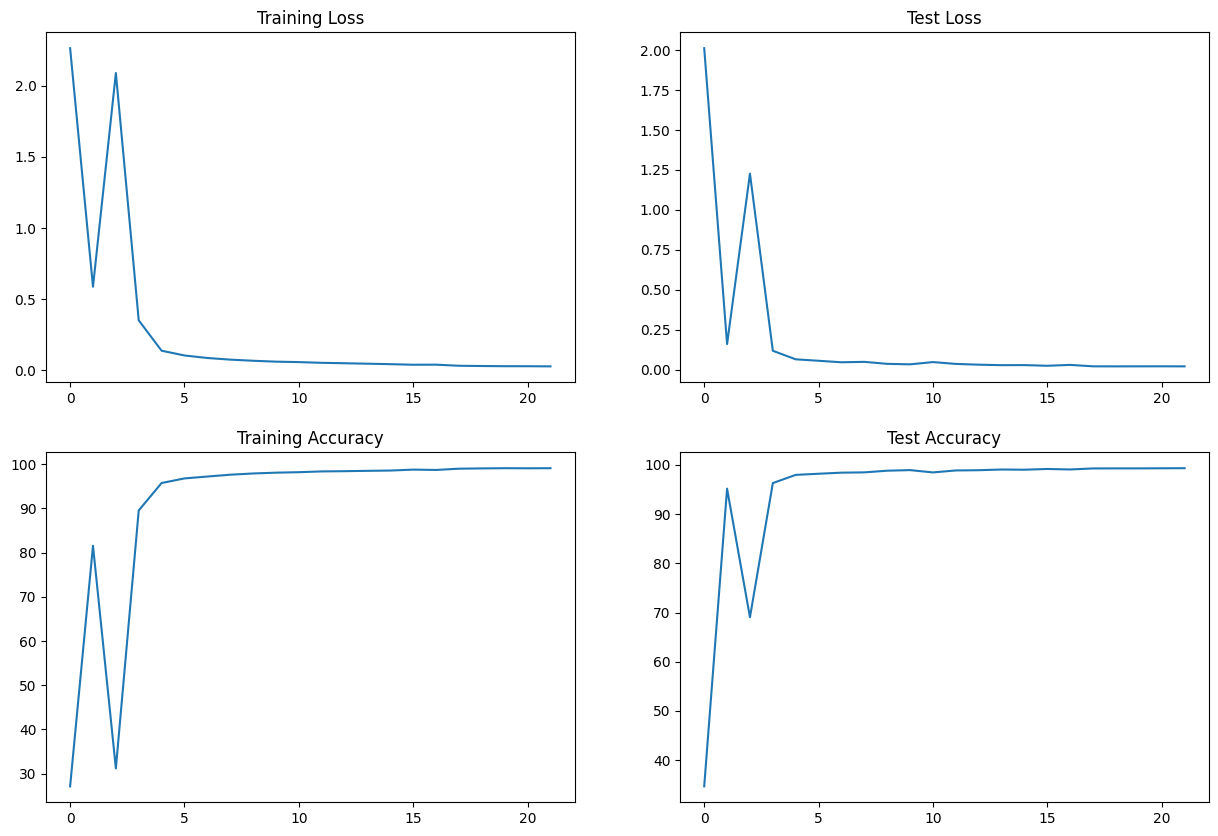

In [35]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(mb.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(mb.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(mb.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(mb.test_acc)
axs[1, 1].set_title("Test Accuracy")